# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [2]:
import pandas as pd
import numpy as np

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [4]:
# Your code here. 
student_data = pd.DataFrame({'X': [17,51,27,21,26,48,19,26,54,30], 'Y': [10,1,5,9,4,2,9,6,0,3]})

In [8]:
student_data.head()

,X,Y
0,17,10
1,51,1
2,27,5
3,21,9
4,26,4


Draw a dispersion diagram (scatter plot) for the data.

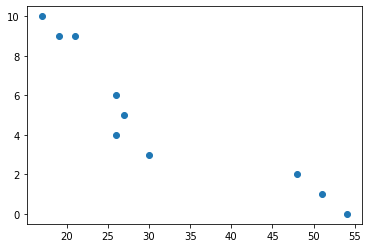

In [9]:
# Your code here.
import matplotlib.pyplot as plt
plt.scatter(student_data.X, student_data.Y)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

#### Your response here. 
- At first sight, it looks like the tardiness decreases as the age increases. So we can say that a negative correlation exists.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [15]:
# Your response here.
print('correlation\n')
print(student_data.corr())
print('\n')
print('covariance\n')
print(student_data.cov())

correlation

          X         Y
X  1.000000 -0.911031
Y -0.911031  1.000000


covariance

            X          Y
X  190.766667 -44.566667
Y  -44.566667  12.544444


##### - correlation tells us if increasing/decreasing one of the variables affects directly the other variable. covariance tells us if the two variables have the same variations of variance. Both measures tells us if there is some dependency between both variables.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [38]:
# Your response here.
import statsmodels.api as sm
model = sm.OLS(student_data.Y, sm.add_constant(student_data.X)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     39.05
Date:                Mon, 17 Jan 2022   Prob (F-statistic):           0.000246
Time:                        11:59:48   Log-Likelihood:                -17.450
No. Observations:                  10   AIC:                             38.90
Df Residuals:                       8   BIC:                             39.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3524      1.289      9.581      0.0

/Users/cnieto/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


- As our hipothesis was that tardiness decreases as age increases, we assumed that this is a lineal regression, so we used that model.
- Turns out that the model  fits the data, since the r value is quite high

Plot your regression model on your scatter plot.

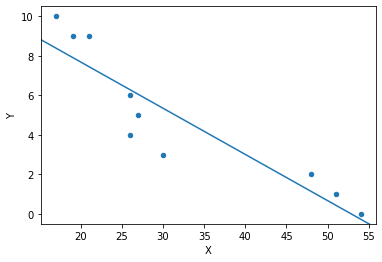

In [37]:
# Your code here.
from statsmodels.graphics.regressionplots import abline_plot

# regress "Y" onto "X" (plus an intercept)
model = sm.OLS(student_data.Y, sm.add_constant(student_data.X))

# scatter-plot data
ax = student_data.plot(x='X', y='Y', kind='scatter')

# plot regression line
_plot = abline_plot(model_results=model.fit(), ax=ax)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

#### Your response here. 
- Based on the model we can say that more than 80% of changes in tardiness can be explained with changes on the Age. This, added to the strong negative correlation, makes us conclude that  our hipothesis that tardiness decreases with age is pretty accurate.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [40]:
# Import any libraries you may need & the data
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
vehicles_df = pd.read_csv('./vehicles.csv')

In [46]:
vehicles_df.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

<AxesSubplot:>

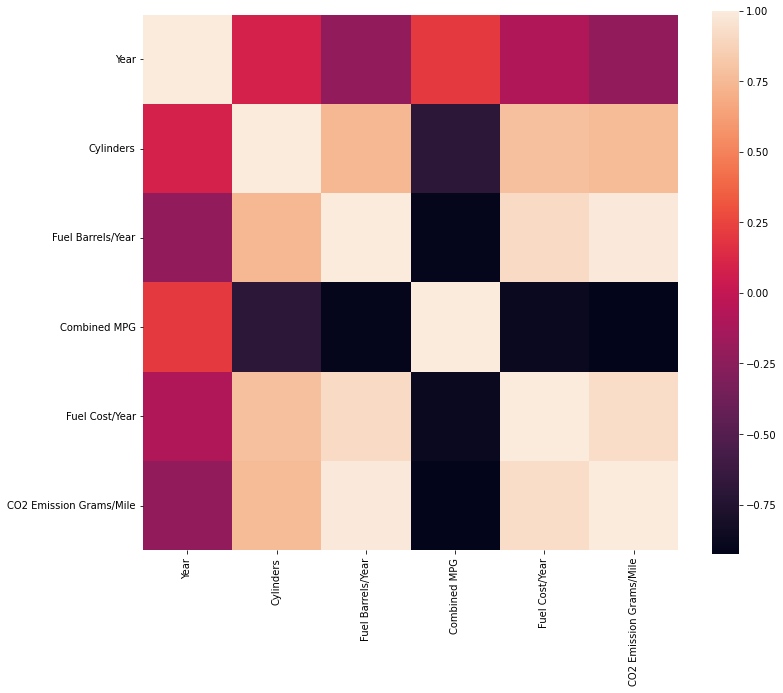

In [54]:
# Your response here. 
short_df = vehicles_df[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year','CO2 Emission Grams/Mile']]
corr_matrix = short_df.corr()
f, ax= plt.subplots(figsize=(12,10))
sns.heatmap(corr_matrix,vmax=1, square=True)

- Year seems to be the less helpful variable since it's close to having 0 correlation. The most informative are Fuel Barrels/year which shows strong positive correlation and Combined MPF which shows strong negative correlation. Cylinders and Fuel Cost/Year have a solid correlation too.
- We will discard Year variable, and build our model with the other 4 variables

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [57]:
# Your response here. 
# use only variables of interest
x = short_df.iloc[: ,[1,2,3,4]]
y = short_df.iloc[:,5]

# then we will use sklearn to split the data between train and test

X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.4, random_state=1)

# Create linear regression object
regressor=LinearRegression() 
#Fit multiple Linear Regression model to our Train set
regressor.fit(X_train,y_train)
# Predicting the Test set results: 
y_pred= regressor.predict(X_test)



Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [59]:
# Your response here. 

# regression coefficients 
print('Coefficients: \n', regressor.coef_) 

# variance score: 1 means perfect prediction 
print("Variance score: {}".format(regressor.score(X_test,y_test)))


Coefficients: 
 [ 1.08464355 18.92107434 -3.363621    0.03341985]
Variance score: 0.9835202781213906


- The most important variable turns out to be Fuels barrel/year according to the score given by the model. The fact that the score is really high makes us think that this is in fact a good model for our data and can be used to predict CO2 emissions.

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [7]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [1]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 